# 图像入门

In [2]:
import numpy as np
import cv2 as cv

## 读取图像

In [3]:
# 用灰度模式加载图像

img = cv.imread('messi.jpg', 0)

## 显示图像

In [7]:
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

## 保存图像

In [9]:
cv.imwrite('messigray.png',img)

True

## 总结

In [11]:
img = cv.imread('messi.jpg',0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27: # ESC 退出
    cv.destroyAllWindows()
elif k == ord('s'): # 's' 保存退出
    cv.imwrite('.png',img)
    cv.destroyAllWindows()

## Matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

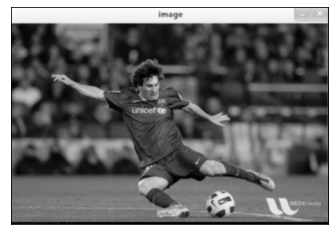

In [15]:
img = cv.imread('messi.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # 隐藏 X 和 Y 轴的刻度值
plt.show()

## OpenCV BGR VS matplotlib RGB

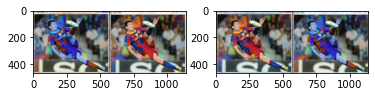

In [19]:
img = cv.imread('messi4.jpg')
# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1]
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

cv.imshow('bgr image',img) # expects true color
cv.imshow('rgb image',img2) # expects distorted color
cv.waitKey(0)
cv.destroyAllWindows()

# 视频入门

## 从相机中读取视频

In [21]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # 逐帧捕获
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # 我们在框架上的操作到这里
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # 显示结果帧e
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# 完成所有操作后，释放捕获器
cap.release()
cv.destroyAllWindows()

## 从文件播放视频

In [26]:
cap = cv.VideoCapture('test.avi')
while cap.isOpened():
    ret, frame = cap.read()
    # 如果正确读取帧，ret为True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


## 保存视频

In [27]:
# 定义编解码器并创建VideoWriter对象
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # 写翻转的框架
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# 完成工作后释放所有内容
cap.release()
out.release()
cv.destroyAllWindows()